# Data Visualisation

#### Import relevant libraries for data visualisation

In [1]:
# Data Processing

import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

In [2]:
# Data Visualisation

import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('cleandata.csv')

In [4]:
data

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,result,grade
0,0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,17,Low
1,1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,16,Low
2,2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,25,Average
3,3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,44,High
4,4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,26,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1039,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,31,Average
1040,1040,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,46,High
1041,1041,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,32,Average
1042,1042,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,30,Average


### Removal of Unnecessary variables

In [5]:
columns_to_remove = ['Unnamed: 0', 'school', 'reason','guardian']

# Removing the Specified Columns
# Using the drop method to remove the columns from the DataFrame
data = data.drop(columns=columns_to_remove, axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         1044 non-null   object
 1   age         1044 non-null   int64 
 2   address     1044 non-null   object
 3   famsize     1044 non-null   object
 4   Pstatus     1044 non-null   object
 5   Medu        1044 non-null   int64 
 6   Fedu        1044 non-null   int64 
 7   Mjob        1044 non-null   object
 8   Fjob        1044 non-null   object
 9   traveltime  1044 non-null   int64 
 10  studytime   1044 non-null   int64 
 11  failures    1044 non-null   int64 
 12  schoolsup   1044 non-null   object
 13  famsup      1044 non-null   object
 14  paid        1044 non-null   object
 15  activities  1044 non-null   object
 16  nursery     1044 non-null   object
 17  higher      1044 non-null   object
 18  internet    1044 non-null   object
 19  romantic    1044 non-null   object
 20  famrel  

In [7]:
print(f'Data frame shape: {data.shape}')

Data frame shape: (1044, 29)


In [8]:
data

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,result,grade
0,F,18,U,GT3,A,4,4,at_home,teacher,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,17,Low
1,F,17,U,GT3,T,1,1,at_home,other,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,16,Low
2,F,15,U,LE3,T,1,1,at_home,other,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,25,Average
3,F,15,U,GT3,T,4,2,health,services,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,44,High
4,F,16,U,GT3,T,3,3,other,other,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,26,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,F,19,R,GT3,T,2,3,services,other,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,31,Average
1040,F,18,U,LE3,T,3,1,teacher,services,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,46,High
1041,F,18,U,GT3,T,1,1,other,other,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,32,Average
1042,M,17,U,LE3,T,3,1,services,services,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,30,Average


In [9]:
# Make a copy of the DataFrame, excluding the target column if it's the last one
prepared_data = data.iloc[:, :-1].copy()

# Determine which columns are categorical
categorical_cols = prepared_data.select_dtypes(include=['object']).columns

# Apply ordinal encoding to these columns, changing the obj values to float values of 1/0.
encoder = OrdinalEncoder()
prepared_data[categorical_cols] = encoder.fit_transform(prepared_data[categorical_cols])
prepared_data

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,result
0,0.0,18,1.0,0.0,0.0,4,4,0.0,4.0,2,2,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4,3,4,1,1,3,6,17
1,0.0,17,1.0,0.0,1.0,1,1,0.0,2.0,1,2,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,5,3,3,1,1,3,4,16
2,0.0,15,1.0,1.0,1.0,1,1,0.0,2.0,1,2,3,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,4,3,2,2,3,3,10,25
3,0.0,15,1.0,0.0,1.0,4,2,1.0,3.0,1,3,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3,2,2,1,1,5,2,44
4,0.0,16,1.0,0.0,1.0,3,3,2.0,2.0,1,2,0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,4,3,2,1,2,5,4,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0.0,19,0.0,0.0,1.0,2,3,3.0,2.0,1,3,1,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,5,4,2,1,2,5,4,31
1040,0.0,18,1.0,1.0,1.0,3,1,4.0,3.0,1,2,0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,4,3,4,1,1,1,4,46
1041,0.0,18,1.0,0.0,1.0,1,1,2.0,2.0,2,2,0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1,1,1,1,1,5,6,32
1042,1.0,17,1.0,1.0,1.0,3,1,3.0,3.0,2,1,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2,4,5,3,4,2,6,30


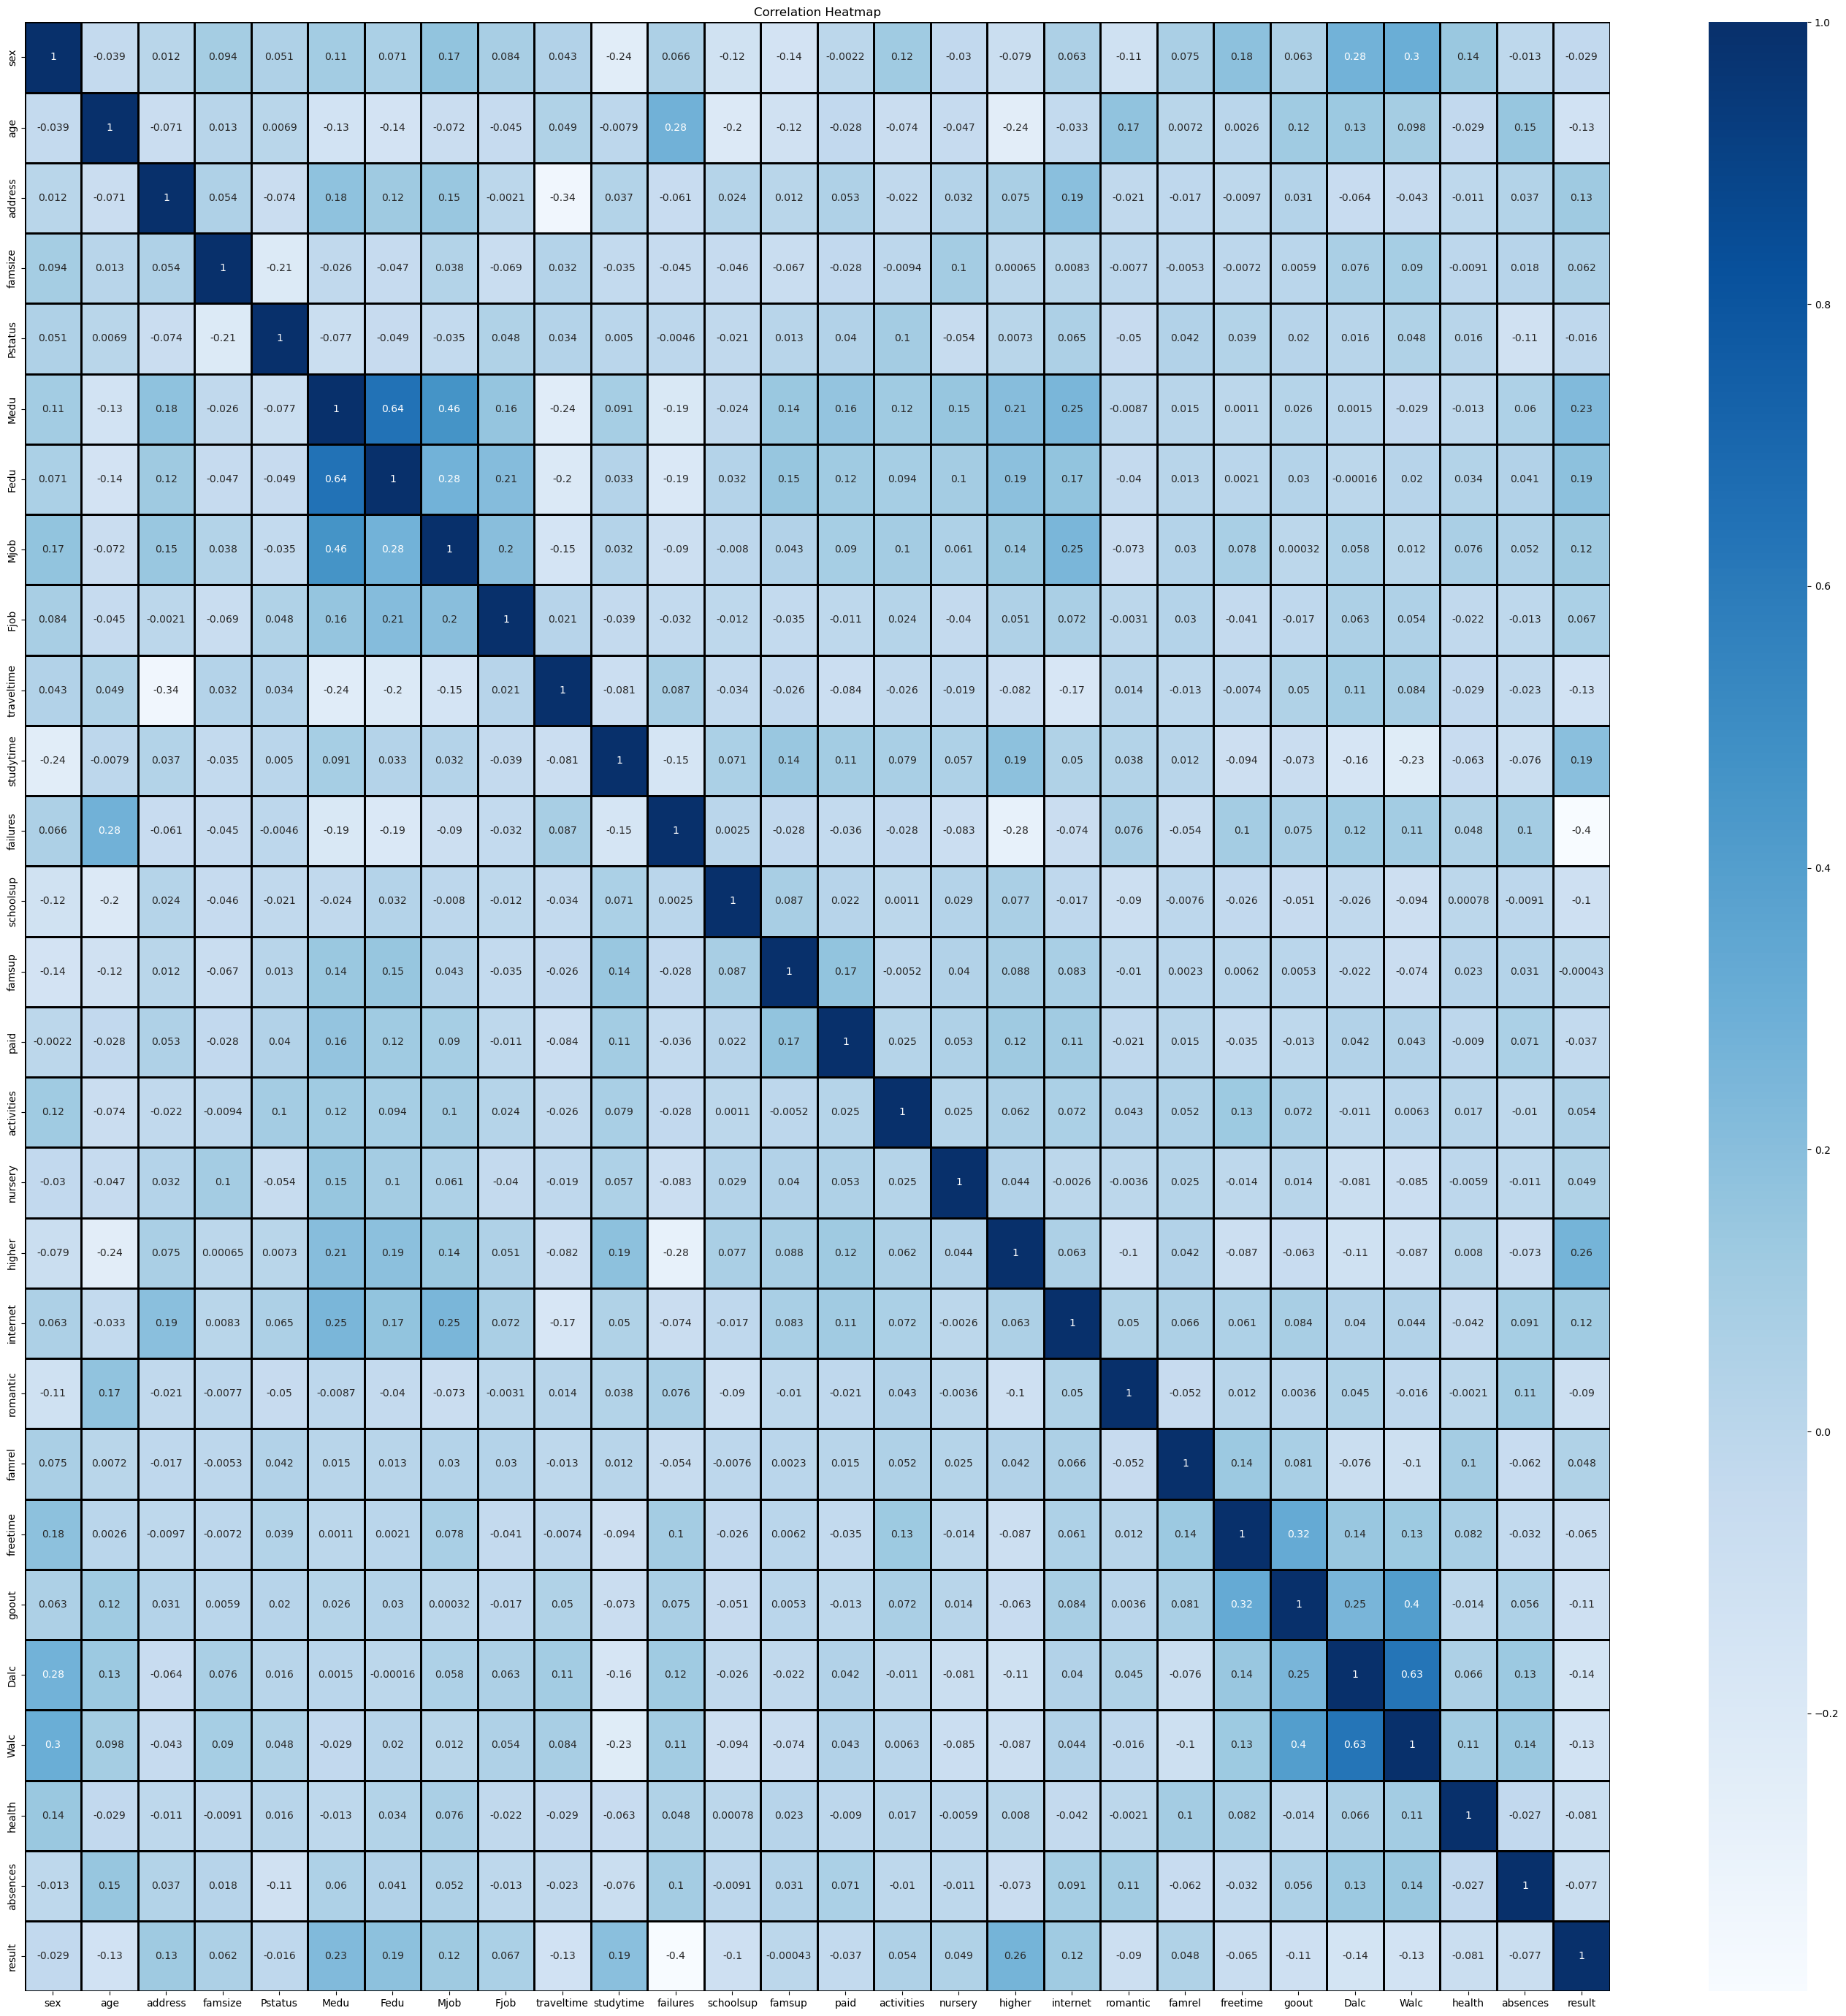

In [10]:
def display_correlation(dataframe, **kwargs):
    _, axis = plt.subplots(figsize=(35, 35))
    
    # Creating a heatmap with the correlation data
    sns.heatmap(data=dataframe.corr(), ax=axis, **kwargs)
    
    axis.set_title('Correlation Heatmap')

heatmap_settings = {
    'annot': True,  # Annotate each cell with the correlation value
    'fmt': '.2g',   # Numeric format of the annotations
    'cmap': 'Blues', 
    'linewidths': 1,
    'linecolor': 'black'
}

# Execute the function to plot the heatmap with the updated settings
display_correlation(prepared_data, **heatmap_settings)

### Correlation Analysis between 'Student Grade' and variables that affect a student's academic performance

Spearman's rank correlation is particularly useful here as it measures the strength and direction of the monotonic relationship between two variables, rather than Pearson's, which measures linear relationships.

In [11]:
SM_Correlation = prepared_data.corr(method='spearman')['result'].sort_values(ascending=False)

# Remove the 'result' entry since its correlation with itself is always 1
SM_Correlation = SM_Correlation.drop(index='result')

# Display the top 10 correlations without including 'result'
print("Top 10 Spearman's Rank Correlations with Student Overall Result:")
print(SM_Correlation.head(10))

Top 10 Spearman's Rank Correlations with Student Overall Result:
higher        0.276086
Medu          0.245189
Fedu          0.203402
studytime     0.200040
address       0.131836
Mjob          0.126266
internet      0.122112
activities    0.065957
Fjob          0.053270
nursery       0.051214
Name: result, dtype: float64


<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Top 10 Spearman Correlation Factors with Result')

Text(0.5, 0, 'Correlation Coefficient')

Text(0, 0.5, 'Features')

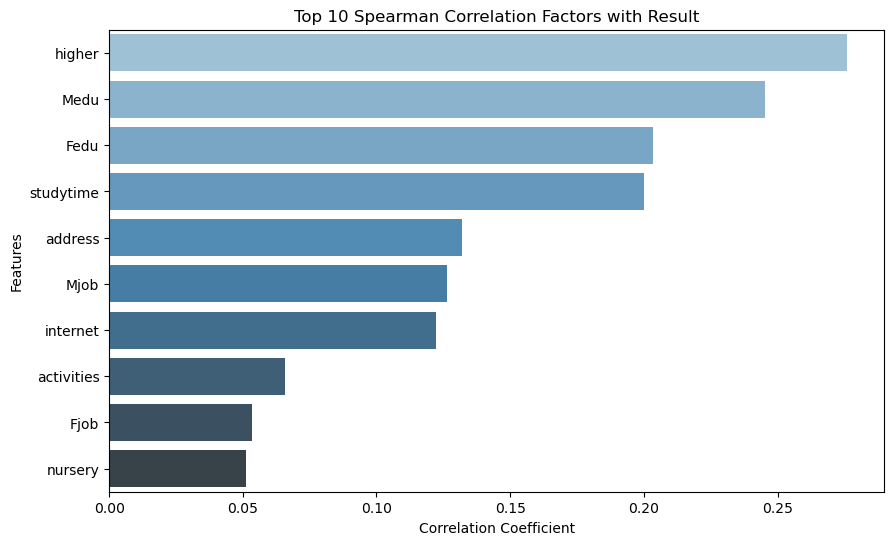

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x=SM_Correlation.head(10).values, y=SM_Correlation.head(10).index, palette='Blues_d')
plt.title('Top 10 Spearman Correlation Factors with Result')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

## Categorical Data Visualisation

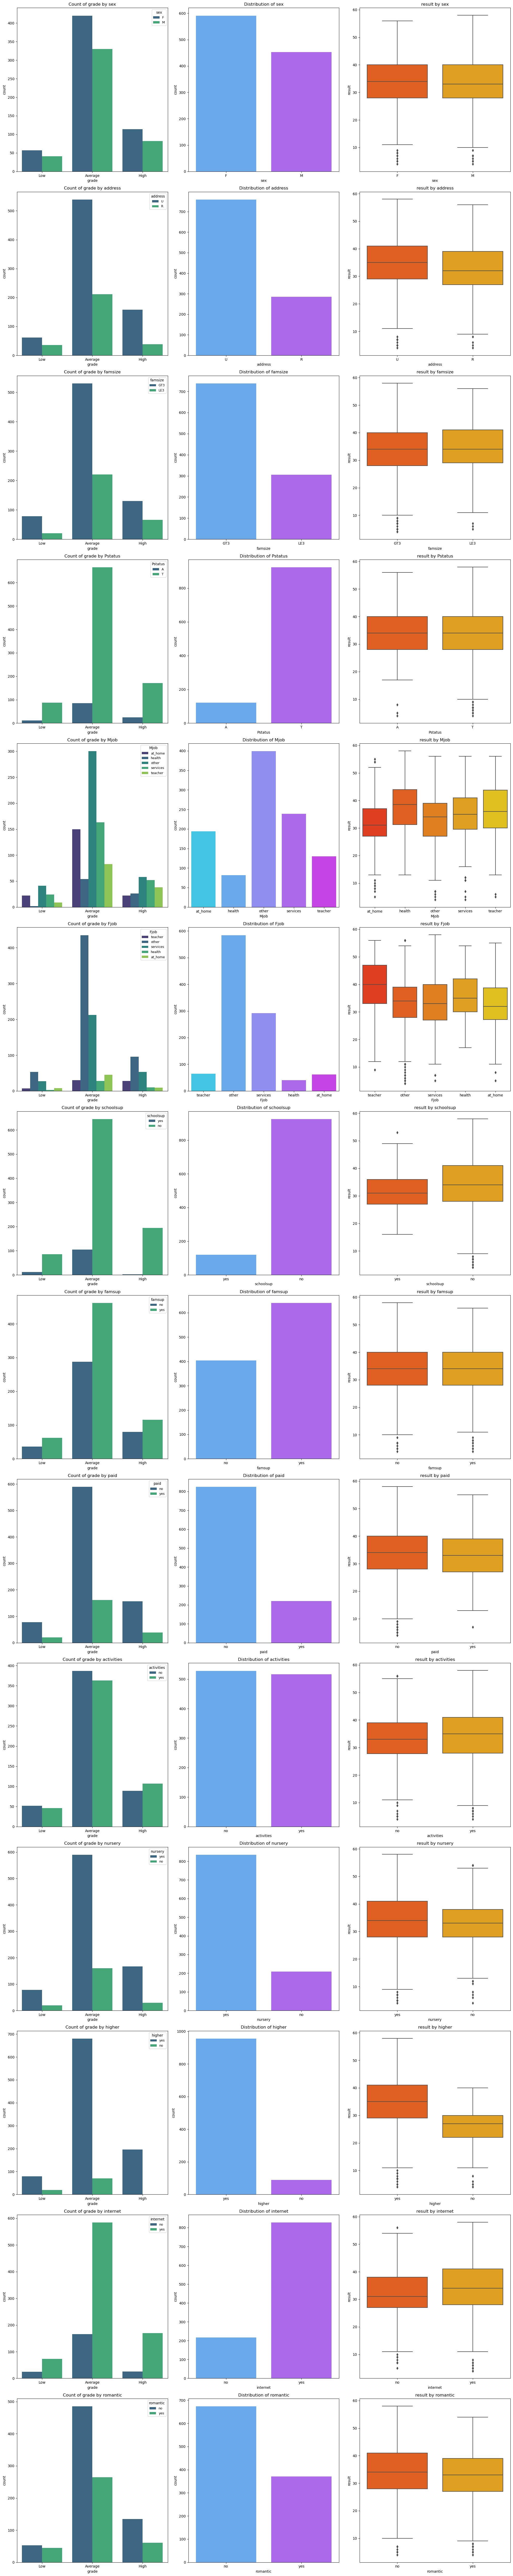

In [13]:
def plot_categorical_visual(categorical_columns, df, response_variable, numeric_variable):
    nrows = len(categorical_columns.columns)
    ncols = 3
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 100))  # Adjust the figure size as needed
    
    for idx, column in enumerate(categorical_columns.columns):
        ax_row = axes[idx] if nrows > 1 else axes
        
        # Plot 1: Count plot of annual grades evaluation by category
        sns.countplot(data=df, x=response_variable, hue=column, ax=ax_row[0], palette='viridis')
        ax_row[0].set_title(f'Count of {response_variable} by {column}')
        ax_row[0].legend(title=column, title_fontsize='10', fontsize='9')

        # Plot 2: Count plot of the category
        sns.countplot(data=df, x=column, ax=ax_row[1], palette='cool')
        ax_row[1].set_title(f'Distribution of {column}')

        # Plot 3: Box plot of numeric outcome by category
        sns.boxplot(data=df, x=column, y=numeric_variable, ax=ax_row[2], palette='autumn')
        ax_row[2].set_title(f'{numeric_variable} by {column}')

    plt.tight_layout()
    plt.show()

students_grades_df = data 
categorical_columns = students_grades_df.select_dtypes(include='object')
categorical_columns = categorical_columns.drop('grade', axis=1)  # Column to drop

plot_categorical_visual(categorical_columns, students_grades_df, 'grade', 'result')

**Some insights that we can gain**
- Students who has `access to internet` generally score `better` than those who do not
- Students who stay in `urban areas` generally perform `better` than those in rural areas.
- Students who `want to pursue a higher education` are more motivated, and can be inferred that they are more hardworking and thus do `better`

## Non-Categorical Data Visualisation

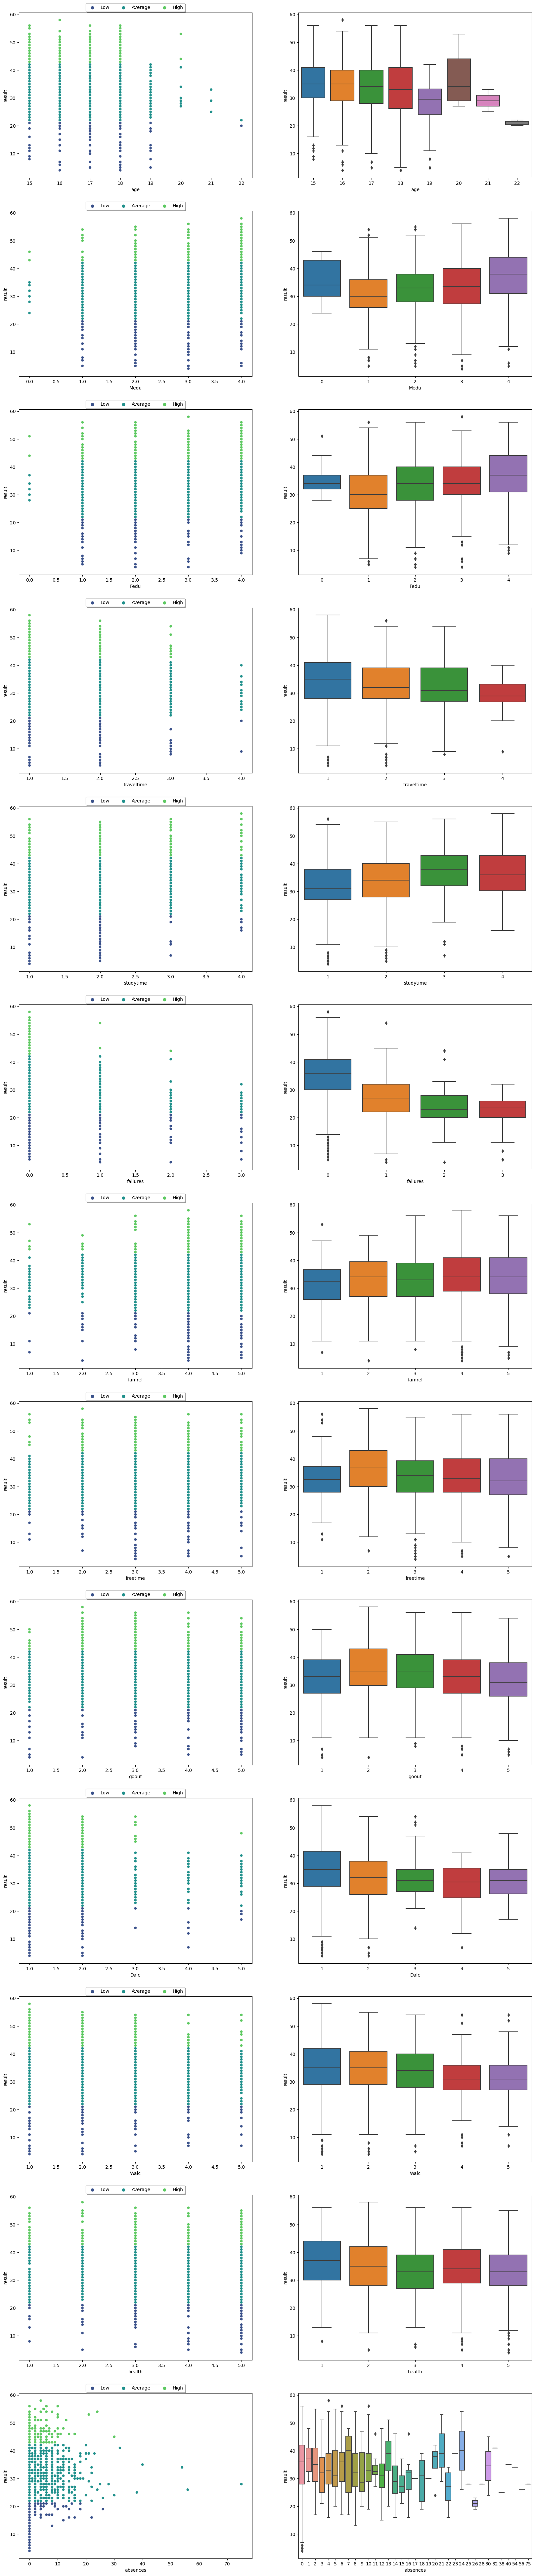

In [14]:
def plot_non_categorical_visual(non_categorical_columns):

    nrows = len(non_categorical_columns.columns)
    ncols = 2
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 100))

    for idx, column in enumerate(non_categorical_columns):
        ax = axes[idx]
        
        # Plot #1: Scatter Plot of distribution of grades to numeric factors
        sns.scatterplot(data=data, x=column,
                        y='result', ax=ax[0], hue='grade', palette='viridis')

        ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.07),
                     ncol=5, fancybox=True, shadow=True)
        
        # Plot #2: Box Plot of numeric results by numeric factors
        sns.boxplot(data=data, x=column,
                    y='result', ax=ax[1])
non_categorical_columns = data.select_dtypes(include=['int64', 'float64'])
non_categorical_columns = non_categorical_columns.drop('result', axis=1)
plot_non_categorical_visual(non_categorical_columns)

**Some insights that we can gain**
- The absences impact students' grade whereby it limits the max score they can get. Seems to imply they cannot do as well
- Students who study `5-10 hours` per week seem to do the best
- Students who take `less time` to travel did better. Perhaps more time available for studying